# Práctica 1 Introducción al Machine Learning. Métricas de clasificación y regresión (I).

# Secuencia de tareas o "pipeline" en ciencia de datos y en machine learning.
En la figura de esta celda se muestra el flujo de las tareas más importantes o "pipeline" en un proyecto de ciencia de datos. Los algoritmos, procedimientos y técnicas de machine learning que se van a estudiar en esta asignatura sirven especialmente para planificar y construir el modelo de machine learning, es decir, para llevar a cabo los pasos 3 y 4 de la figura. En cierta medida también las tareas del último paso, el de operacionalizar, en el que se lanza, monitoriza y mantiene el proyecto realizado.

![Flujo de tareas pipeline ciencia de datos.png](<attachment:Flujo de tareas pipeline ciencia de datos.png>)
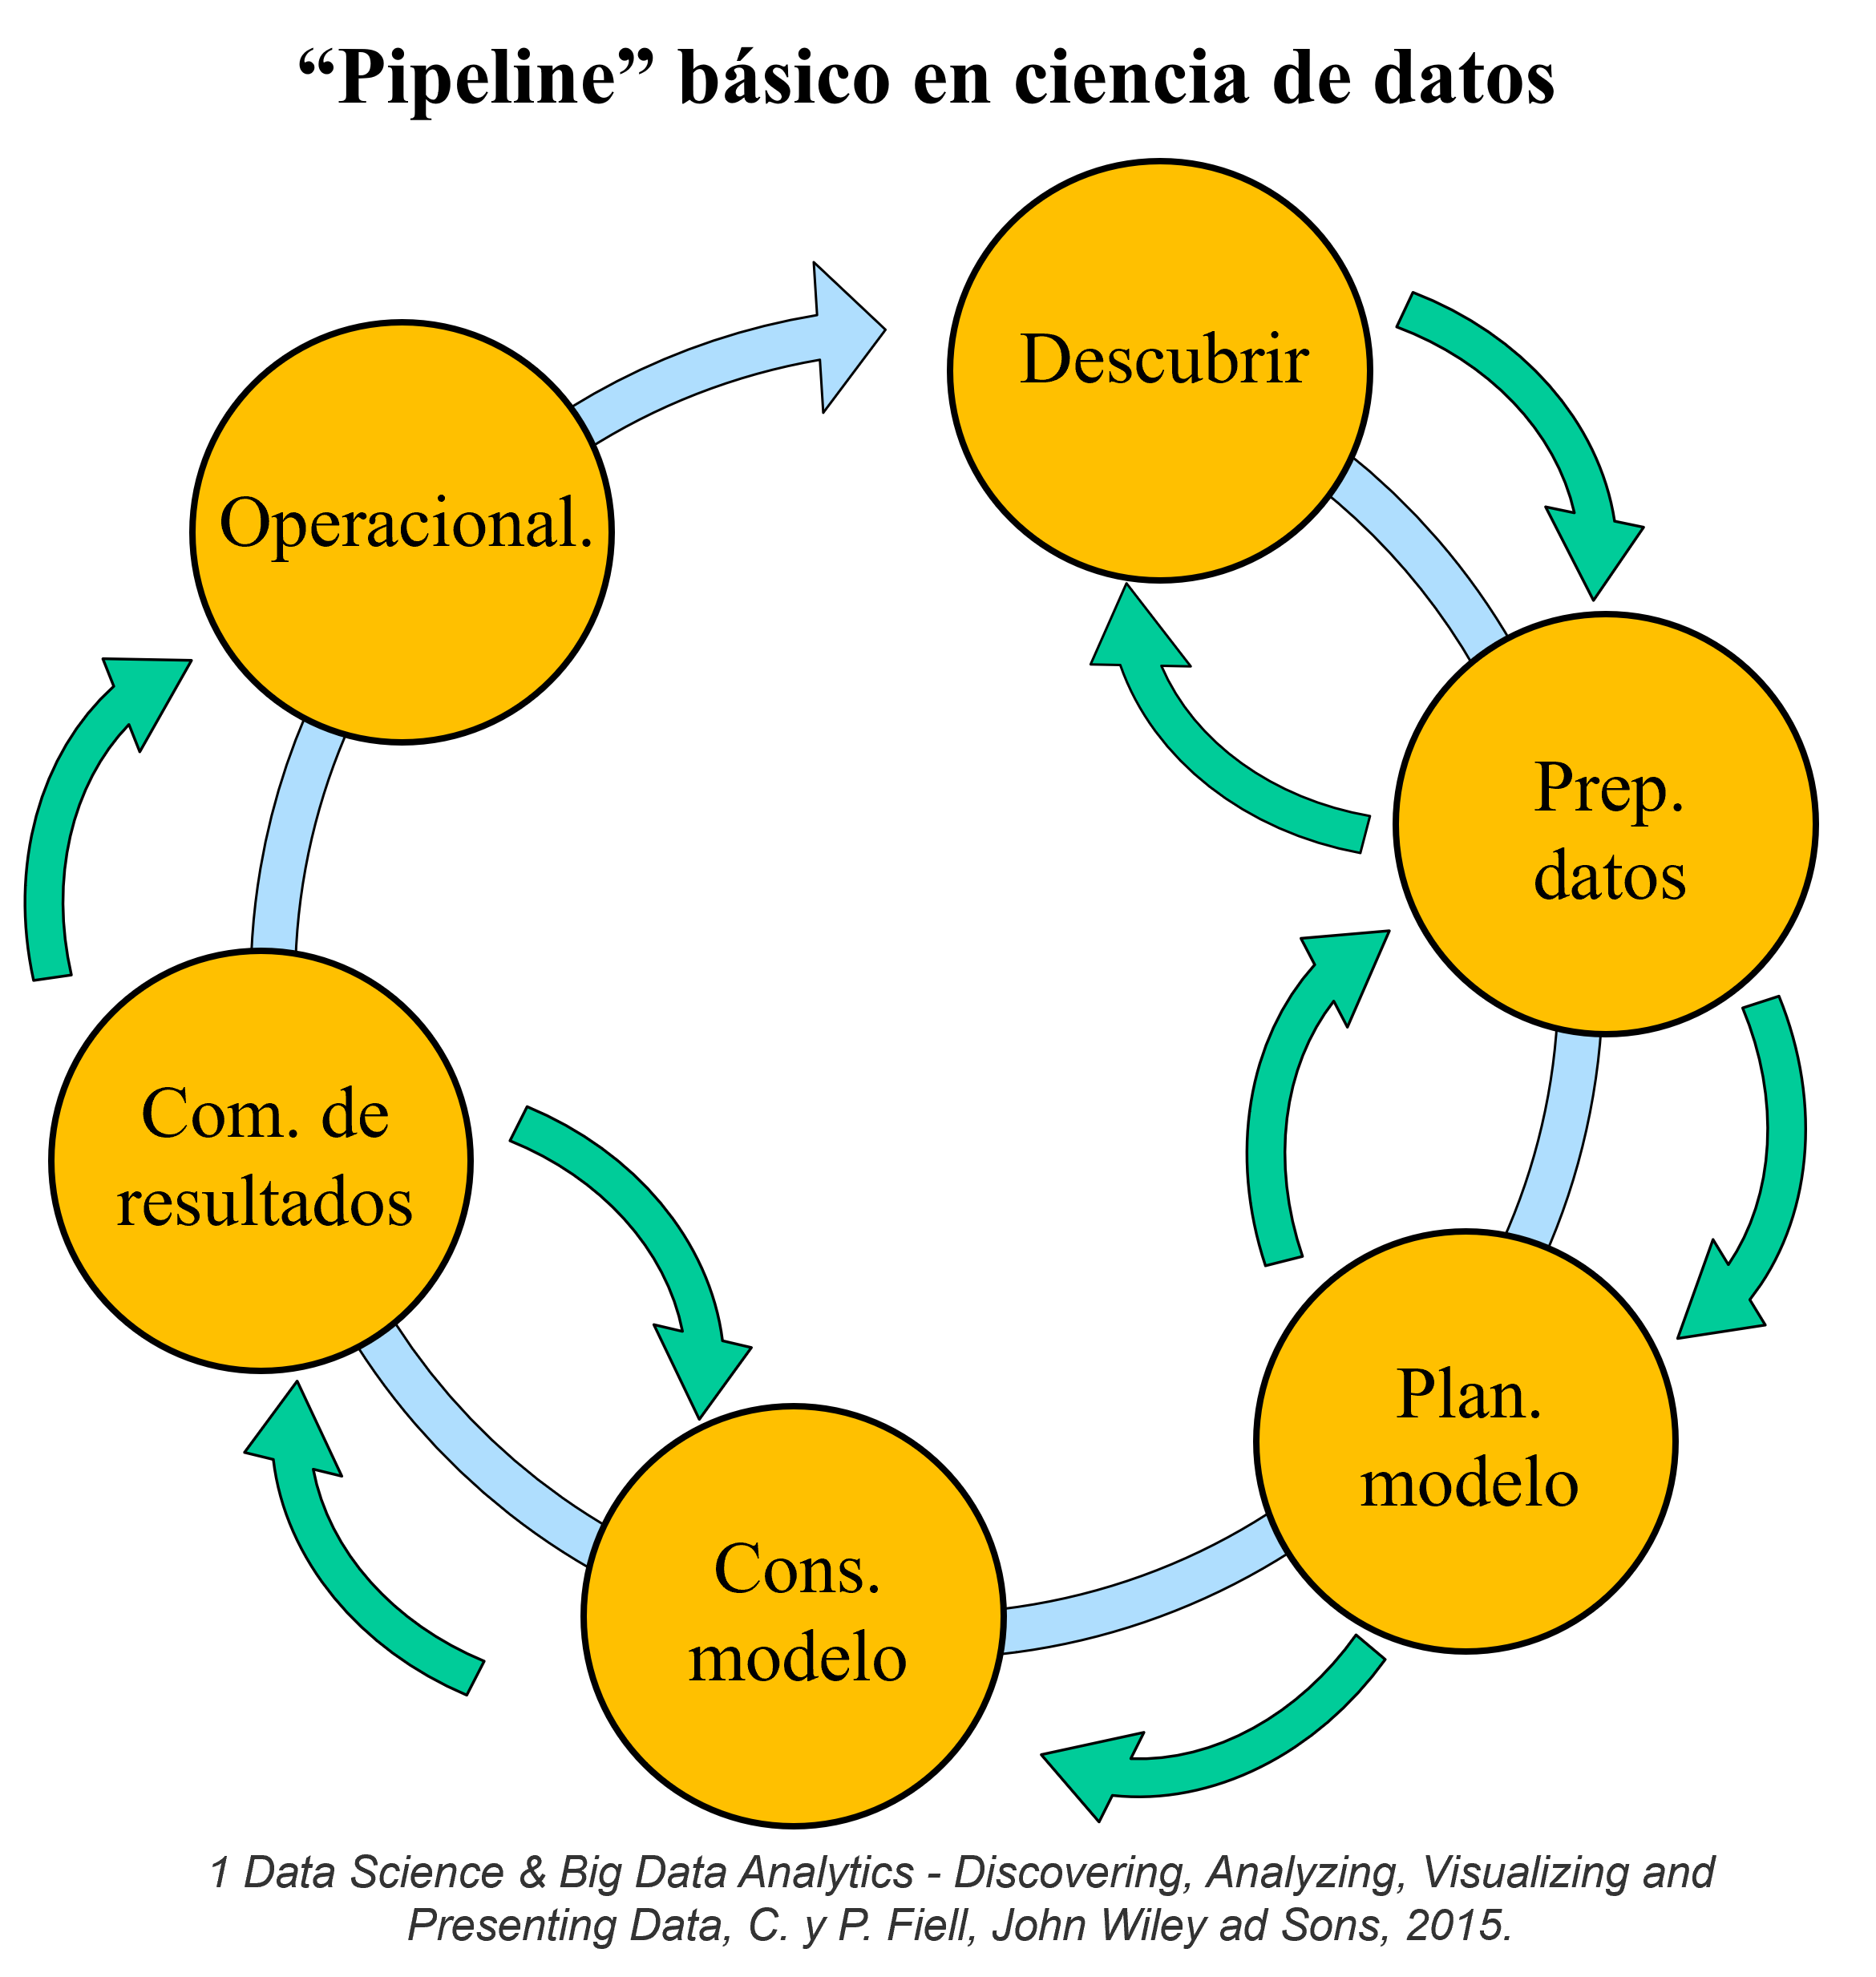

Para planificar y construir el modelo de machine learning hay que seguir una serie de fases. En la siguiente imagen se muestran dichas fases. En esta y en las siguientes sesiones se trabajará en diferentes aspectos de cada una de las fases mostradas.

![Flujo de tareas pipeline machine learning.png](<attachment:Flujo de tareas pipeline machine learning.png>)
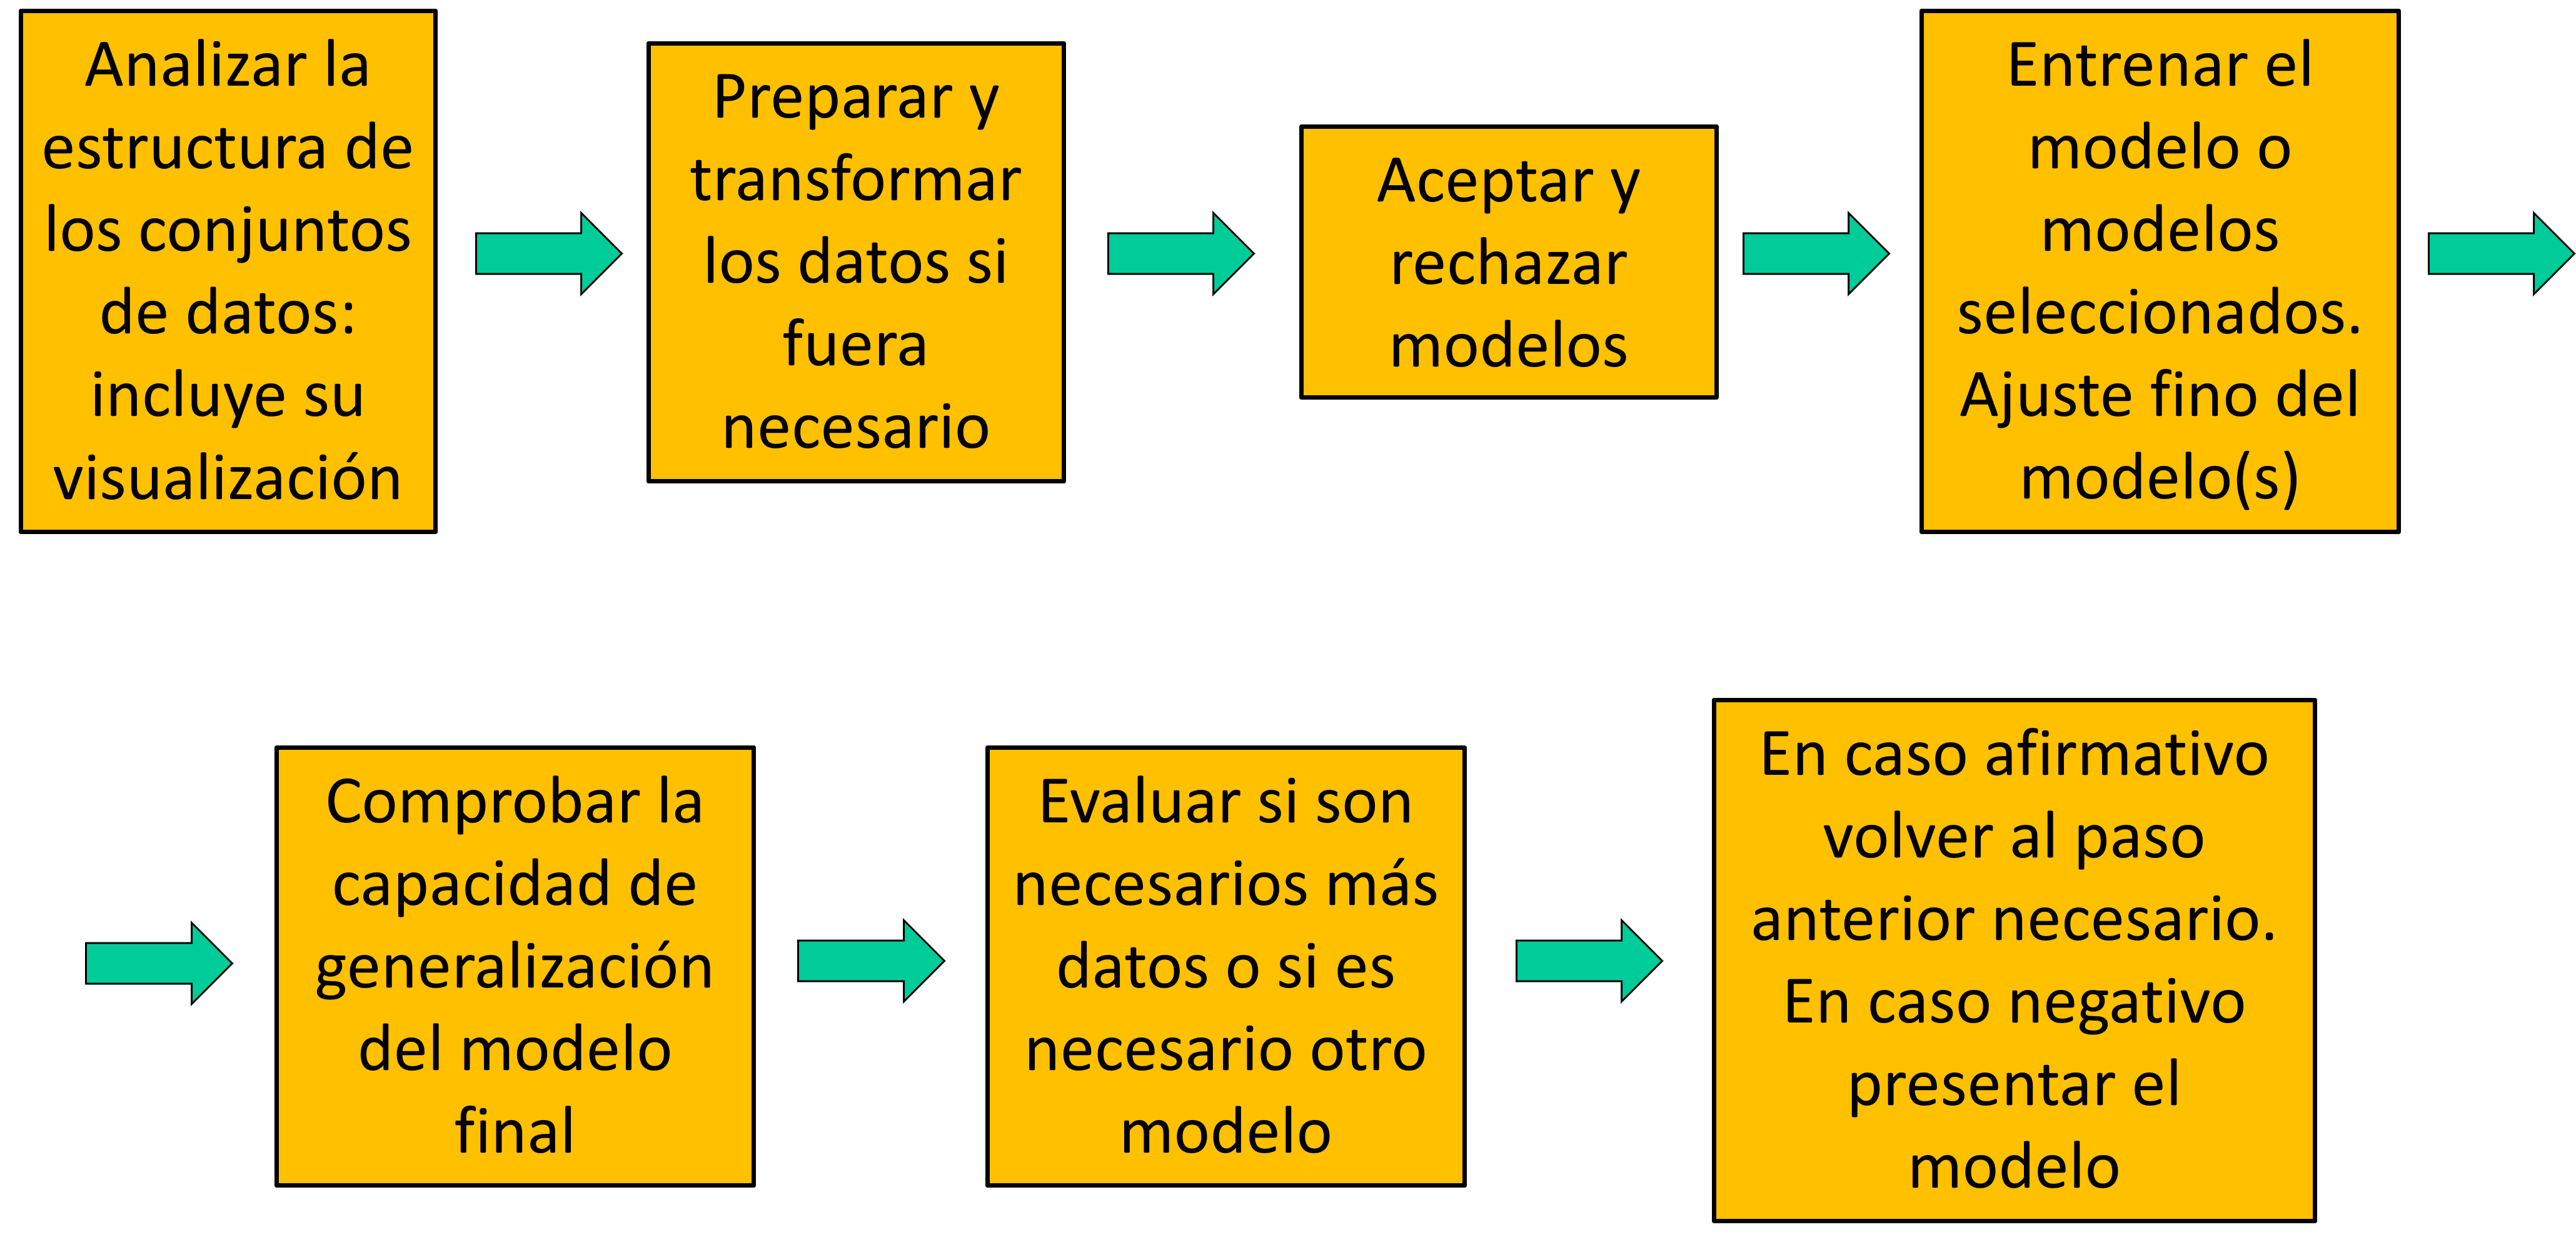

# Scikit-learn

En esta asignatura se va a emplear *Scikit-learn* como la biblioteca principal o API (" Application Programming Interface") de técnicas de machine learning. *Scikit-learn* contiene las principales técnicas necesarias en la asignatura y además está especialmente bien construida, por lo que es apropiada para llevar a cabo las prácticas. Sus principales características son:

<font color='blue'> Consistencia  </font>: todos los objetos son consistentes y poseen un interfaz común y simple. Los principales métodos de los objetos son:


<ul>
<li>Estimadores: todo objeto, que constituye un modelo de machine learning, puede estimar los parámetros del modelo mediante el método <i>fit()</i>. Cualquier parámetro empleado como argumento de <i>fit()</i> se considera un hiperparámetro. </li>
<li>Transformadores: algunos estimadores pueden transformar el conjunto de datos sobre el que están operando. El método que se utiliza en este caso es <i>transform()</i>. Se pueden estimar los parámetros del estimador y aplicar la transformación en la misma operación mediante el método <i>fit_transform()</i>. </li>
<li>Predictores: algunos estimadores pueden realizar predicciones dado un conjunto de datos. El método se denomina <i>predict()</i>. Para obtener el acierto del estimador se puede emplear el método <i>score()</i>. </li>
</ul>
   

<font color='blue'> Inspección  </font>: los hiperparámetros empleados y los parámetros estimados se pueden consultar a través de variables. Por ejemplo, en algunos estimadores con la variable *strategy* y *statistics_* respectivamente.

<font color='blue'> No hay proliferación de clases  </font>: no genera nuevas clases propias. Los conjuntos de datos se representan con vectores de tipo *Numpy* o con matrices dispersas de *SciPy*. Los hiperparámetros son cadenas de caracteres o números.

<font color='blue'> Composición </font>: las clases pueden combinarse para formar una secuencia de tareas o "pipeline" en una única línea de código. Este procedimiento emplea la clase *Pipeline*, una vez definido el "pipeline" puede aplicarse a distintos conjuntos de datos. Por ejemplo, se puede transformar un conjunto de datos para cambiar la escala de las características y luego aplicar un modelo de machine learning determinado a ese conjunto de datos transformado.

<font color='blue'> Valores por defecto razonables </font>: se proporcionan valores por defecto razonables, que permiten empezar a trabajar y ganar experiencia con rapidez.




## Instalación de Scikit-learn. 

Si *Scikit learn* no está instalado, puede ejecutar la siguiente orden en el símbolo del sistema:

*pip install -U scikit-learn*.

Para ver qué versión de *Scikit Learn* está instalada, puede ejecutar en el símbolo del sistema: *python -m pip show scikit-learn*.

Para ver qué paquetes están instalados, puede ejecutar en el símbolo del sistema: *python -m pip freeze* y *python -c "import sklearn; sklearn.show_versions()*.

Para más datos puede consultar: *https://scikit-learn.org/stable/install.html*

## Importación de bibliotecas. 

Tras instalar la bilioteca *Scikit-learn*, importamos las bibliotecas auxiliares necesarias. Si no tiene alguna instalada, puede seguir el mismo procedimiento seguido con *Scikit-learn* para instalarla. Princialmente emplearemos:

<font color='blue'> Pandas  </font>: para obtener conjuntos de datos.

<font color='blue'> Numpy  </font>: para alimentar las clases de *Scikit-learn* y para tratar los datos generados por las clases de *Scikit-learn*.

<font color='blue'> Matplotlib  </font>: para dibujar gráficas. 

In [143]:
# Importación de bibliotecas auxiliares
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

## Métricas para clasificación. 

En primer lugar, vamos a utilizar las métricas vistas en clase de teoría para medir el rendimiento de una técnica de Machine Learning. Generaremos clases de forma sintética, es decir, clases que no corresponden a un caso real y progresivamente avanzaremos desde métricas más simples a métricas más avanzadas.

**Generación de clases**

Vamos a generar dos clases mediante la clase de *Scikit-learn* llamada *make_classification*. Esta clase crea clases distribuidas alrededor de puntos que denomina vértices siguiendo una distribución gaussiana de desviación estándar 1. 

El parámetro <font color='blue'> n_features</font> determina el número de características. 

El parámetro <font color='blue'>n_classes</font> es el número de clases, el valor por defecto es 2. 

<font color='blue'>n_clusters_per_class</font> es el número de 'clusters' por clase. 

Finalmente, <font color='blue'>class_sep</font> separa en mayor o en menor medida las clases/clusters haciendo más o menos sencilla la tarea de clasificación, respectivamente.

En este primer ejemplo generaremos dos clases con una única característica.

El tamaño de la clase 0 es: (501, 1)
El tamaño de la clase 1 es: (499, 1)


Text(0.5, 0, 'Característica (x)')

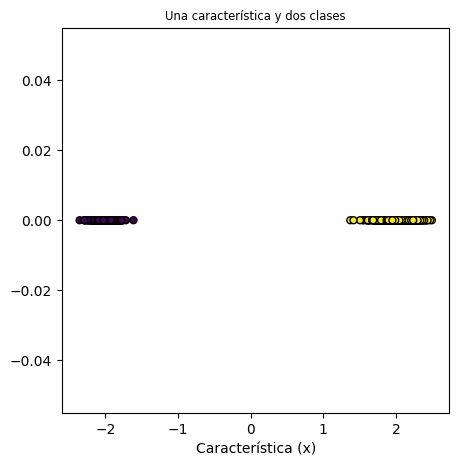

In [144]:
# Importamos la clase necesaria para generar las clases
from sklearn.datasets import make_classification


# Generamos las dos clases para un total de 1000 puntos
numero_puntos = 1000
x, y = make_classification(
    n_samples=numero_puntos, n_features=1, n_redundant=0, n_informative=1, 
    n_classes=2, n_clusters_per_class=1, class_sep=2.0
)

indices_clase_0 = y==0
indices_clase_1 = y==1

x_clase_0 = x[indices_clase_0]
x_clase_1 = x[indices_clase_1]
y_clase_0 = y[indices_clase_0]
y_clase_1 = y[indices_clase_1]

print(f'El tamaño de la clase 0 es: {x_clase_0.shape}' )
print(f'El tamaño de la clase 1 es: {x_clase_1.shape}' )

# Para dibujar mostraremos en el eje de abcisas los valores de la característica
# En el eje de ordenadas mostraremos la clase de cada característica del eje x, 
# vamos a emplear el símbolo círculo y los dibujaremos en la línea y igual a 0, 
# podríamos haber elegido cualquier otra línea con valor y igual a constante
eje_y = np.zeros(numero_puntos)

plt.figure(figsize=(5, 5))
plt.title("Una característica y dos clases", fontsize="small")
plt.scatter(x, eje_y, marker="o", c=y, s=25, edgecolor="k")
plt.xlabel('Característica (x)')


**Clasificador de tipo lineal**

En primer lugar vamos a emplear un clasificador lineal para separar las dos clases creadas. La clase *SGDClassifier* es un clasificador lineal en el que los parámetros se estiman mediante el algoritmo de Descenso de Gradiente Estocástico (SGD, "Stochastic Gradient Descent"). Como es un clasificador lineal sólo construye hiperplanos para separar las clases. No vamos a estudiar en detalle cómo es este clasificador ya que el propósito es emplearlo como herramienta para generar predicciones y así poder analizar las métricas de clasificación. 

[0 1 0 0]


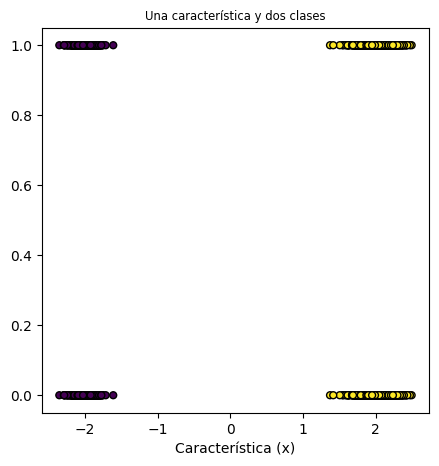

In [145]:
# Importamos la clase de la técnica de clasificación de Machine Learning que vamos a emplear
from sklearn.linear_model import SGDClassifier

# Instanciamos el clasificador, no cambiamos el valor por defecto de ningún hiperparámetro
clasificador_sgd = SGDClassifier()

# Estimación de los parámetros del modelo para el conjunto de datos
clasificador_sgd.fit(x, y)

# Predicción de los valores. y_sal son los valores de salida del clasificador
# La salida del clasificador produce valores de 0 o de 1
y_sal = clasificador_sgd.predict(x)
# Varios valores de salida
print(y_sal[0:4])

# Dibujamos los datos 
plt.figure(figsize=(5, 5))
plt.title("Una característica y dos clases", fontsize="small")
plt.scatter(x, eje_y, marker="o", c=y, s=25, edgecolor="k")
plt.xlabel('Característica (x)')
# Dibujamos la predicción en una línea de eje de ordenadas igual a 1
eje_y_prediccion = np.zeros(numero_puntos) + 1
plt.scatter(x, eje_y_prediccion, marker="o", c=y_sal, s=25, edgecolor="k")



**Cálculo del acierto del clasificador**

Como se ha explicado en la introducción, los estimadores de *Scikit-learn* posee un método llamado *score()* para calcular el acierto del estimador. En la siguiente celda se emplea este método para mostrar el acierto. En el siguiente punto mostraremos otras métricas y se deducirá cómo se calcula el acierto o "score".

In [146]:
# Obtenemos el porcentaje de acierto al clasificar los datos: empleamos el método score
acierto = clasificador_sgd.score(x, y)
print("Acierto cuando es:")
# Resultados con tres decimales
print(round(acierto,3))

Acierto cuando es:
0.993


**Métricas de clasificación**

Como se ha visto en clase de teoría existen varias métricas para medir el rendimiento de un clasificador. Las principales derivan de la **matiz de confusión** y son la **exactitud** ("accuracy"), la **precisión** ("precision") y la **sensibilidad o exahustividad** ("recall"). A partir de la precisión y la sensibilidad se obtiene la **puntuación F1**. En la siguiente celda de código se importan las clases necesarias y se programa una función que devuelve las métricas mencionadas para un modelo de machine learning, un conjunto de datos de entrada del modelo, y un conjunto de datos de salida verdaderos.

In [147]:
# Importamos la clase matriz confusión 
# Importación de los métodos requeridos
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definimos una función para utilizarla posteriormente
def obtencion_metricas_clasificacion(Entradas, modelo, Salidas_verdaderas):
    '''Obtención de las métricas de clasificación'''
    # Salidas predichas por el modelo y las salidas verdaderas
    Salidas_predichas = modelo.predict(Entradas)
    matriz_confusion = confusion_matrix(Salidas_verdaderas, Salidas_predichas)
    print("La matriz de confusión es:")
    print(matriz_confusion)

    # Métricas 
    exactitud = accuracy_score(Salidas_verdaderas, Salidas_predichas)
    precision = precision_score(Salidas_verdaderas, Salidas_predichas)
    sensibilidad_recall = recall_score(Salidas_verdaderas, Salidas_predichas)
    puntuacion_f1 = f1_score(Salidas_verdaderas, Salidas_predichas)

    decimales = 4
    print("La exactitud es: ")
    print(round(exactitud,decimales))
    print("La precisión es:")
    print(round(precision,decimales))
    print("La sensibilidad es:")
    print(round(sensibilidad_recall,decimales))
    print("La puntuación F1 es:")
    print(round(puntuacion_f1,decimales))

# Obtención de las métricas para el clasificados SGD en el problema de clasificación
# de dos clases y una única característica
obtencion_metricas_clasificacion(x, clasificador_sgd, y)

La matriz de confusión es:
[[497   4]
 [  3 496]]
La exactitud es: 
0.993
La precisión es:
0.992
La sensibilidad es:
0.994
La puntuación F1 es:
0.993


**Ejercicio 1: valores de las métricas para el caso de una característica**

Calcule los valores de las métricas para la matriz de confusión anterior. 

Según los valores obtenidos en las métricas, ¿a qué métrica corresponde el valor de acierto que ofrece el método *score()*?


**La curva de precisión y sensibilidad**

El clasificador calcula un valor de tipo real ($R$) para cada nuevo dato de entrada. Mediante un valor de umbral de discriminación transforma los valores reales en valores de 0 o 1. Si el valor real supera el umbral, entonces se asigna como valor de salida un 1, si es menor un 0. El valor de umbral de discriminación tiene un impacto en la precisión y sensibilidad del clasificador. 

En la métrica de puntuación F1 se alcanza el valor máximo de 1 si la precisión y la sensibilidad son perfectas. Sin embargo, existe una relación de compromiso entre la mejora en la precisón y la mejora en la sensibilidad. Si se mejora la sensibilidad, se empeora la sensibilidad y viceversa. 

Vamos a ver este efecto gracias a la curva de precisión y sensibilidad que se obtiene con la función *precision_recall_curve()*. En esta curva se muestran sobre el eje x distintos valores de umbral. En el eje y se muestran los valores de precisión y sensibilidad para cada uno de los umbrales. La función *precision_recall_curve()* genera los valores necesarios para construir la curva dados los valores reales ($R$) de salida  del clasificador (no los valores de 0 o 1) y los valores de 0 o 1 verdaderos. El método *decision_function()* permite obtener los valores reales del clasificador.


[2.49288263]
1.8607761228785047


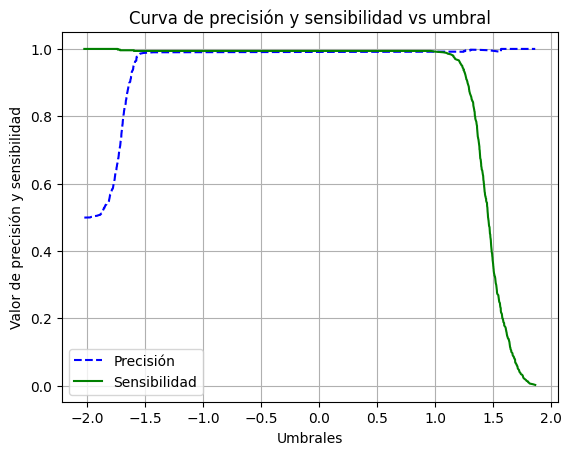

In [148]:
# Importamos la función precision_recall_curve
from sklearn.metrics import precision_recall_curve

# Los valores reales generados por el clasificador, los llamamos puntuaciones
y_puntuaciones = clasificador_sgd.decision_function(x)

# Aquí puede observar el valor máximo de los datos de entrada y 
# el valor real generado por el clasificador asocidado a dicho valor de entrada
index_max = np.argmax(x)
print(x[index_max])
print(y_puntuaciones[index_max])

# Los argumentos de entrada de precision_recall_curve son 
# los valores de las etiquetas ( y vale 0 y 1) y
# los valores reales de la salida de la técnica de machine learning (y_puntuaciones)
# Valores generados por precision_recall_curve
precisiones, sensibilidades, umbrales = precision_recall_curve(y, y_puntuaciones)

# Función que dibuja la curva de precisión-sensibilidad
def dibujar_precision_sensibilidad_vs_umbral(precisiones, sensibilidades, umbrales):
    plt.plot(umbrales, precisiones[:-1], "b--", label="Precisión")
    plt.plot(umbrales, sensibilidades[:-1], "g-", label="Sensibilidad")

    plt.title('Curva de precisión y sensibilidad vs umbral')
    plt.xlabel('Umbrales')
    plt.ylabel('Valor de precisión y sensibilidad')
    plt.legend()
    plt.grid()

# Dibujamos la curva particular de nuestro ejemplo
dibujar_precision_sensibilidad_vs_umbral(precisiones, sensibilidades, umbrales)

**Ejercicio 2: relación de compromiso entre la precisión y la sensibilidad**

Explique por qué al aumentar el umbral desciende el valor de sensibilidad (empeora) y en cambio aumenta el valor de precisión (mejora).

Explique asimismo por qué al disminuir el umbral aumenta el valor de sensibilidad (mejora)  y en cambio disminuye el valor de precisión (empeora).

**Curva "Receiver Operating Characteristic" (ROC) y valor de Área bajo la Curva o "Area under Curve" (AUC)**

Como se ha visto en la clase de teoría la curva ROC representa la sensibilidad respecto a la probabilidad de falsa alarma en un clasificador binario cuando se varía el umbral de discriminación. A la sensibilidad también se le llama ratio de verdaderos positivos (TPR) o PD. La probabilidad de falsa alarma es la ratio de falsos negativos, es decir, es igual a 1 menos la especificidad (tasa de verdaderos negativos). El AUC es el área bajo la curva ROC.

La función *roc_curve()* permite obtener los valores necesarios para construir la curva ROC. La función *roc_auc_score()* calcula el valor de AUC.  A continuación se representa la curva ROC y se obtiene el valor de AUC.

El área bajo la curva es (AUC):
0.996


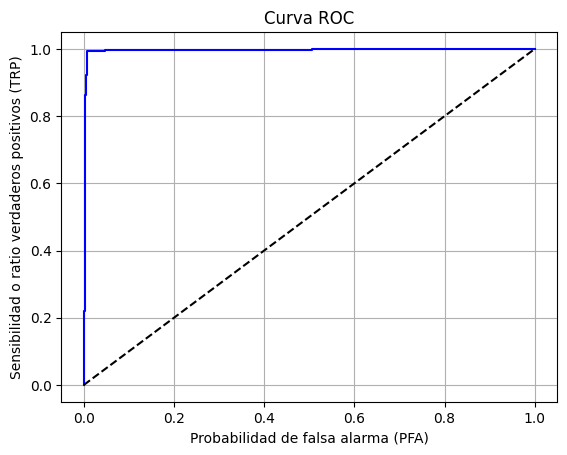

In [149]:
# Importamos las funciones requeridas
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Valores para construir la curva ROC. Los argumentos de entrada de roc_curve son los 
# mismos que en precision_recall_curve
prob_falsa_alarma, ratio_verdaderos_positivos, umbrales = roc_curve(y, y_puntuaciones)

def dibujar_curva_roc(prob_falsa_alarma, ratio_verdaderos_positivos):
    plt.plot(prob_falsa_alarma, ratio_verdaderos_positivos, "b-", )
    plt.plot([0, 1], [0, 1], 'k--') # Diagonal

    plt.title('Curva ROC')
    plt.xlabel('Probabilidad de falsa alarma (PFA)')
    plt.ylabel('Sensibilidad o ratio verdaderos positivos (TRP)')
    plt.grid()

dibujar_curva_roc(prob_falsa_alarma, ratio_verdaderos_positivos)

print('El área bajo la curva es (AUC):')
AUC = roc_auc_score(y, y_puntuaciones)
decimales = 4
print(round(AUC,decimales))

**Ejercicio 3: interpretación de la curva ROC**

En la curva ROC hemos dibujado la propia curva y una línea recta de guiones correspondiente al caso en el que la sensibilidad es igual a la probabilidad de falsa alarma. 

¿Qué tipo de clasificador tendría una curva ROC como la de la línea de guiones? Razone la repuesta.

## Métricas para regresión. 



**Generación de datos**

Ahora vamos a utilizar las métricas vistas en clase de teoría para medir el rendimiento de una técnica de Machine Learning en una tarea de regresión. De nuevo, generaremos datos de forma sintética.

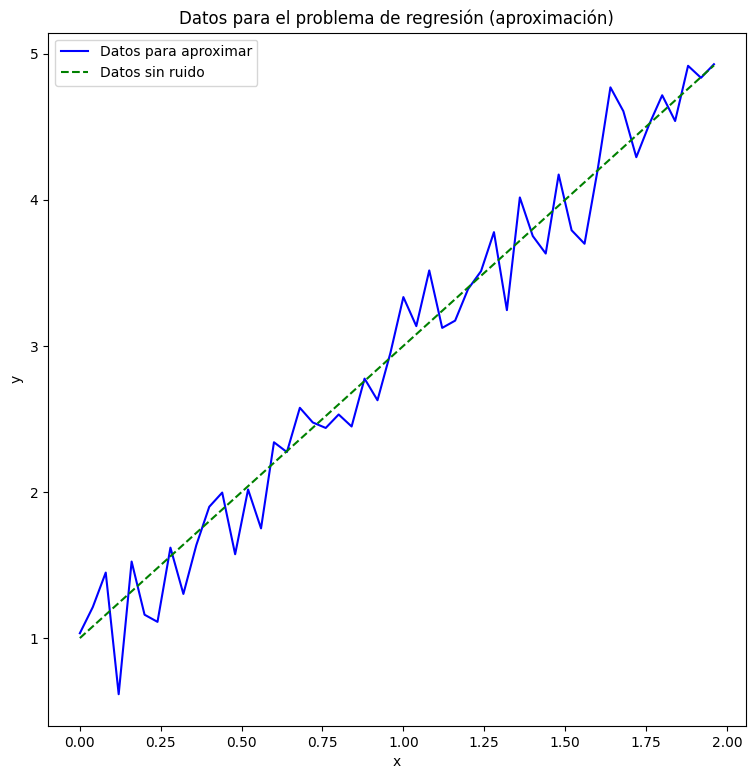

In [150]:
# Función para generar datos para el problema de regresión
ini_x = 0
fin_x = 2.0
num_puntos = 50
paso = (fin_x-ini_x)/num_puntos
x = np.arange(start=ini_x, stop=fin_x, step=paso)
x = x.reshape(-1,1)

# Función lineal a la que añadimos ruido según una distribución normal (gaussiana)
y_limpia = 1 + 2 * x
reduccion_ruido = 5
y = y_limpia + np.random.randn(num_puntos, 1)/reduccion_ruido

# Dibujamos la gráfica con los datos
plt.figure(figsize=(9, 9))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.plot(x, y_limpia, "g--", label='Datos sin ruido')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

**Regresor lineal**

En primer lugar, vamos a emplear un regresor o aproximador de tipo lineal para aproximar los datos generados. Los datos tienen una tendencia lineal por lo que este regresor debería proporcionar buenos resultados. La clase *LinearRegression()* proporciona un regresor de tipo lineal con los habituales métodos *fit()* y *predict()*. En la siguiente celda se utilizan estos métodos para realizar la predicción y se programa la funcion para dibujar los resultados.

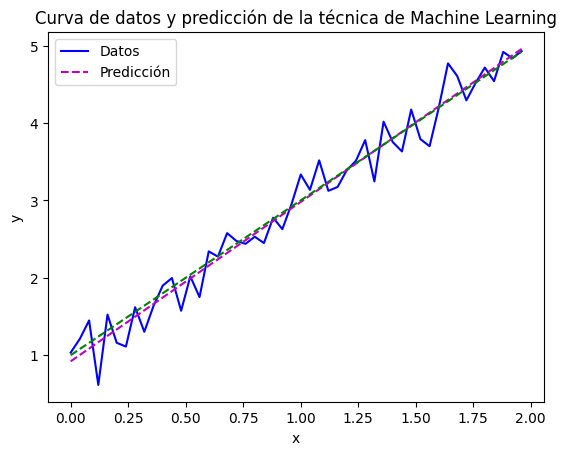

In [151]:
# Importamos la clase para aplicar un ajuste lineal a los datos
from sklearn.linear_model import LinearRegression

# Instanciamos el regresor o aproximador: modelo lineal
aproximador_lineal = LinearRegression()

# Estimación de los parámetros del modelo regresor
aproximador_lineal.fit(x, y)

# Predicción de los valores
y_sal = aproximador_lineal.predict(x)

# Función para dibujar los datos de entrada y salida y las predicciones
def dibuja_ajuste_datos_regresion(x, y, x_entrada, y_sal):
    
    # Ordenamos los valores por si estuvieran desordenados
    indices = np.argsort(x[:,0], axis=0)
    x = x[indices]
    y = y[indices]

    indices = np.argsort(x_entrada[:,0])
    x_entrada = x_entrada[indices]
    y_sal = y_sal[indices]
    
    plt.plot(x, y, "b-", label="Datos")
    plt.plot(x_entrada, y_sal, "m--", label="Predicción")

    plt.title('Curva de datos y predicción de la técnica de Machine Learning')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()

# Dibujamos el resultado y añadimos los datos originales sin ruido para comparar
dibuja_ajuste_datos_regresion(x, y, x, y_sal)
plt.plot(x, y_limpia, "g--", label='Datos sin ruido')

**Métricas de regresión**

En clase de teoría se han visto las tres métricas principales de regresión:

Error cuadrátrico medio (MSE):

$$
\begin{equation*}
    MSE({\bf w})=\frac{1}{N} \sum_{n=1}^N \{ y(x_n, {\bf w})- t_n \}^2 
\end{equation*}
$$

Error absoluto medio (MAE):

$$
\begin{equation*}
    MAE({\bf w})=\frac{1}{N} \sum_{n=1}^N | y(x_n, {\bf w})- t_n |
\end{equation*}
$$

Coeficiente de determinación R2

$$
\begin{equation*}
    R^2=1-\frac{\sum{(t_i-y_i)^2}}{\sum{(y_i-\mu_t)^2}}
\end{equation*}
$$

En la siguiente celda de código se importan las funciones correspondientes a las métricas anteriores y se programa una función para obtenerlas a partir de un conjunto de datos.


In [152]:
# Importamos las funciones de cálculo de las principales métricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definimos una función para reutilizar posteriormente
def obtencion_metricas_regresion(y, y_sal, titulo_tipo_datos):
    # Error cuadrático medio cometido por la técnica de machine learning
    # Error de entrenamiento
    error_MSE = mean_squared_error(y, y_sal)

    mensaje = 'El error cuadrático medio ' + '' + titulo_tipo_datos + '' + 'es:'
    print(mensaje)
    print(round(error_MSE,4))
                                                
    # Error absoluto medio cometido por la técnica de machine learning
    # Error de entrenamiento
    error_MAE = mean_absolute_error(y, y_sal)

    mensaje = 'El error absoluto medio ' + '' + titulo_tipo_datos + '' + 'es:'
    print(mensaje)
    print(round(error_MAE,4))
                                                
    # Coeficiente de determinación 
    # En el conjunto de datos de entrenamiento
    R2 = r2_score(y, y_sal)

    mensaje = 'El valor del coeficiente de determinación R2 ' + '' + titulo_tipo_datos + '' + 'es:'
    print(mensaje)
    print(round(R2,3))
                                                
    
# Métricas de error de regresión
titulo_tipo_datos = ''
obtencion_metricas_regresion(y, y_sal, titulo_tipo_datos)

El error cuadrático medio es:
0.0511
El error absoluto medio es:
0.1819
El valor del coeficiente de determinación R2 es:
0.965


**Efecto de los valores atípicos**

Imaginemos que en el proceso de obtención de los datos varias etiquetas poseen un ruido o un error en la obtención mucho mayor que el resto de valores. Estos valores son valores atípicos ("outliers" en inglés) que tendrán un efecto sobre las métricas que miden el rendimiento del regresor.

En la siguiente celda Introducimos varios valores atípicos.

Text(0, 0.5, 'y')

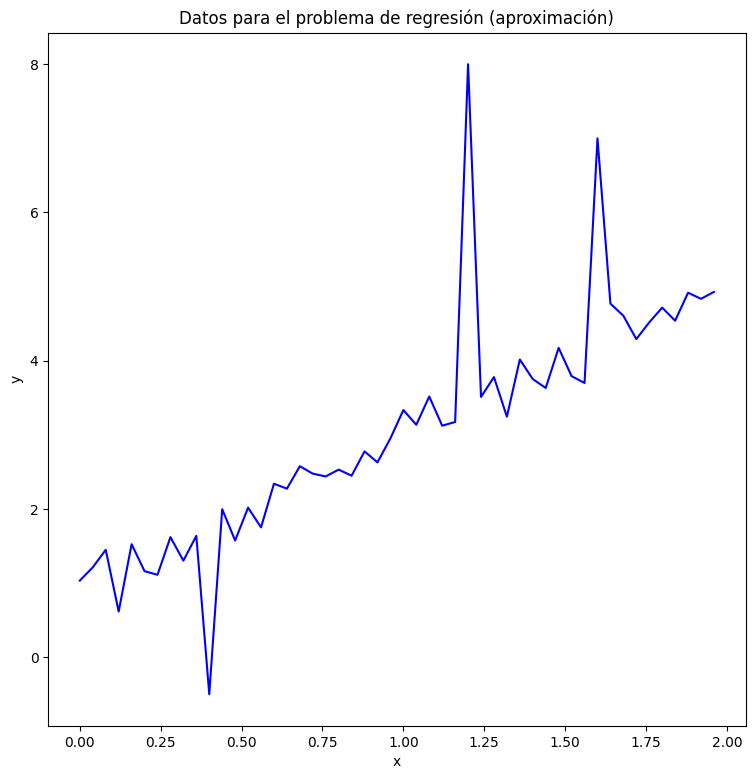

In [153]:
# Valores atípicos
y[10] = -0.5
y[30] = +8.0
y[40] = +7.0

plt.figure(figsize=(9, 9))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')

**Ejercicio 4: efecto de los valores atípicos**

Calcule los valores de las métricas MSE y MAE y dibuje los resultados ¿qué efecto ha tenido la existencia de valores atípicos? Recuerde que debe entrenar de nuevo el regresor y predecir los valores de salida.

**Generación de nuevos datos para regresión**

A continuación vamos a generar nuevos datos de regresión para comparar el rendimiento de dos regresores diferentes: el lineal y uno no lineal. De nuevo añadiremos ruido a los datos según una distribución gaussiana. Dibujamos los datos con y sin ruido.

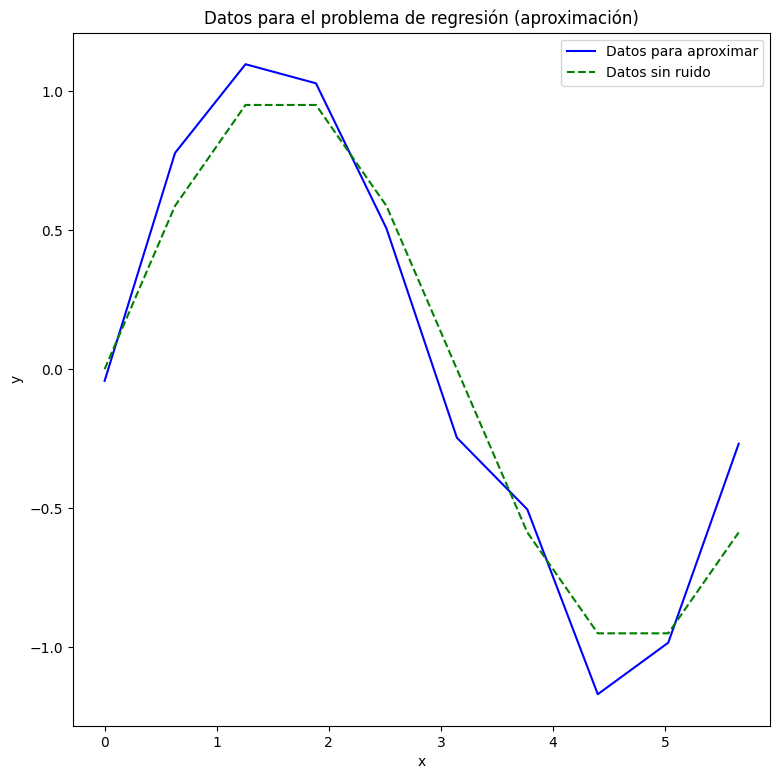

In [154]:
# Función para generar datos para el problema de regresión
ini_x = 0
fin_x = 2*np.pi
num_puntos = 10
paso = (fin_x-ini_x)/num_puntos
x = np.arange(start=ini_x, stop=fin_x, step=paso)
x = x.reshape(-1,1)

# Función seno a la que añadimos ruido según una distribución normal:(gaussiana)
y_limpia = np.sin(x)
reduccion_ruido = 5
y = np.sin(x) + np.random.randn(num_puntos, 1)/reduccion_ruido

plt.figure(figsize=(9, 9))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.plot(x, y_limpia, "g--", label='Datos sin ruido')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


**Ejercicio 5: utilización del regresor lineal en el nuevo conjunto de datos**

Utilice el regresor lineal para aproximar el nuevo conjunto de datos, dibuje los nuevos datos y las salidas predichas por el regresor lineal. Obtenga las métricas de regresión. ¿Cuán bueno es el rendimiento?


**Regresor polinomial**

Ahora vamos a emplear un regresor polinomial, que puede llegar a ser mucho más complejo que el lineal. Emplearemos la clase *PolynomialFeatures()* en combinación con un regresor lineal para poder generar un polinomio de grado deseado. La clase *PolynomialFeatures()* eleva los valores de entrada a las potencias del polinomio. Con esos valores de entrada elevados a las potencias necesarias se construye un regresor lineal de modo que el modelo completo es un polinomio. El polinomio tendrá un grado igual a 9.


In [155]:
# Importamos la clase que permite elevar a potencias
from sklearn.preprocessing import PolynomialFeatures

# Instanciamos la clase PolynomialFeatures
poly = PolynomialFeatures(degree=9)
# Se calculan las potencias de x y se guardan
x_elevado_potencias = poly.fit_transform(x)

# Aproximador lineal
aproximador_lineal = LinearRegression()
aproximador_lineal.fit(x_elevado_potencias, y)
# Valores de salida del polinomio que mejor se ajusta a los datos {x,y}
y_sal = aproximador_lineal.predict(x_elevado_potencias)


**Ejercicio 6: rendimiento del regresor polinómico**

Dibuje los datos de salida y las predicciones y obtenga las métricas de regresión. ¿Cuán bueno es su rendimiento?

**Ejercicio 7: aumento del tamaño del conjunto de datos para evaluar el rendimiento del regresor**

En el ejemplo anterior se ha empleado un conjunto de datos reducido, de tan solo 10 muestras para entrenar el regresor y se han empleado esas mismas 10 muestras para comprobar su rendimiento. Vamos a aumentar el número de datos utilizados en la predicción para tener una mejor visión del rendimiento del regresor polinómico.

Aumente el número de puntos hasta 100 y obtenga los datos de salida con el polinomio de grado 9 obtenido con el primer conjunto de datos de 10 valores. Dibuje los resultados: los datos de entrada *x* y las etiquetas *y* del conjunto de 10 muestras y los nuevos datos de entrada *x* y las predicciones correspondientes al nuevo conjunto de 100 muestras

Mirando los resulados obtenidos en la gráfica, ¿es la precisión del regresor polinómico de grado 9 cuando se entrena con 10 muestras elevada o reducida? Razone la respuesta.

**Aumento del tamaño del conjunto de datos para entrenar el regresor**

Obviamente, debemos aumentar el número de datos empleados para construir el regresor. 
En la siguiente celda se producen 100 datos y se visualizan.

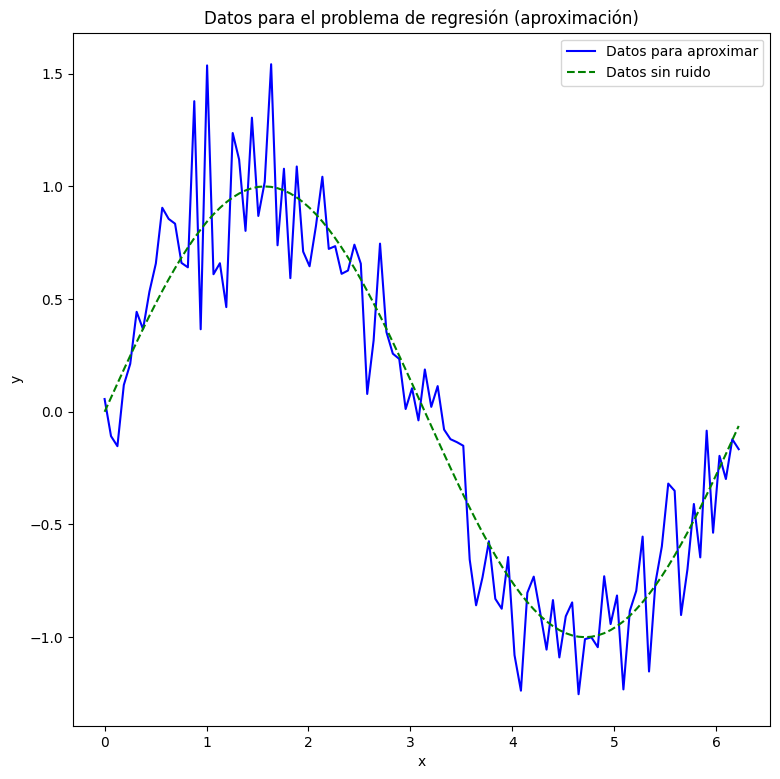

In [156]:
# Función para generar datos para el problema de regresión
ini_x = 0
fin_x = 2*np.pi
num_puntos = 100
paso = (fin_x-ini_x)/num_puntos
x = np.arange(start=ini_x, stop=fin_x, step=paso)
x = x.reshape(-1,1)

# Función seno a la que añadimos ruido según una distribución normal:(gaussiana)
y_limpia = np.sin(x)
reduccion_ruido = 5
y = np.sin(x) + np.random.randn(num_puntos, 1)/reduccion_ruido

plt.figure(figsize=(9, 9))
plt.plot(x, y, "b-", label='Datos para aproximar')
plt.plot(x, y_limpia, "g--", label='Datos sin ruido')
plt.title('Datos para el problema de regresión (aproximación)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


**Generación de los conjuntos de entrenamiento y test**

Como se ha visto en clase de teoría cuando se dispone de un conjunto de datos, hay que dividir dicho conjunto en dos conjuntos disjuntos: el conjunto de entrenamiento y un conjunto de test. El primero sirve para calcular los parámetros del modelo y el segundo para comprobar su capacidad de generalización. Para ello vamos a emplear la función *train_test_split()*

Hasta el momento hemos empleado el conjunto total de datos únicamente para entrenamiento, ahora vamos a utilizar una parte de los datos para entrenamiento y otro para test. En la siguiente celda se generan un conjunto de entrenamiento y de test en una porporción 80%-20%.

In [157]:
# Importación del método train_test_split para separar el conjunto total de datos
# en un conjunto de entrenamiento y de test
from sklearn.model_selection import train_test_split

# Seleccionamos un 80% de los datos para entrenamiento y un 20% para test
x_ent, x_test, y_ent, y_test  = train_test_split(x, y, test_size=0.2)

**Ejercicio 8: resultados del regresor lineal en el conjunto de entrenamiento y de test**


Entrene el regresor lineal y obtenga las métricas del conjunto de entrenamiento y de test. Visualice los resultados de la aproximación del conjunto de entrenamiento: dibuje los datos originales y la línea generada con el conjunto de entrenamiento. Añada los puntos de test del conjunto de test y las salidas predichas para el conjunto de test, puede emplear la opción *scatter()*.


¿Existe un problema de sobreajuste? ¿Existe un problema de subajuste? Razone la respuesta.

**Ejercicio 9: resultados del regresor polinómico de grado 9 con el conjunto de entrenamiento y de test**

Entrene el polinomio de grado 9 con los mismos datos de entrenamiento que en el caso del regresor lineal y obtenga las métricas del conjunto de entrenamiento y de test. Visualice los resultados de la aproximación del conjunto de entrenamiento: dibuje los datos originales y la línea generada con el conjunto de entrenamiento. Añada los puntos de test del conjunto de test y las salidas predichas para el conjunto de test.

¿Existe un problema de sobreajuste? ¿Existe un problema de subajuste? Razone la respuesta.

**Ejercicio 10: error MSE de entrenamiento y de test frente al grado del polinomio**

Un modelo lineal es un polinomio de grado 1. Hemos visto que el rendimiento del polinomio de grado 9 en el último problema de regresión es mejor que el del modelo lineal, ahora bien, es posible que un polinomio de otro grado ofrezca una precisión mayor.

En este ejercicio se pide variar el grado del polinomio para encontrar el de menor error MSE. Variaremos el grado del polinomio desde 1 hasta 30


Obtenga la curva del error de entrenamiento y de test respecto al grado del polinomio y obtenga el mejor polinomio en este problema de aproximación.

¿Hay alguna diferencia entre la tendencia del error MSE de entrenamiento y de test?